In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
df = pd.read_csv('student_data.csv')
df.columns = df.columns.str.strip()

In [16]:
features = ['studytime', 'failures', 'absences']
target = 'G3'
df = df[features + [target]]

In [17]:
print("Missing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

Missing values:
 studytime    0
failures     0
absences     0
G3           0
dtype: int64

Data types:
 studytime    int64
failures     int64
absences     int64
G3           int64
dtype: object


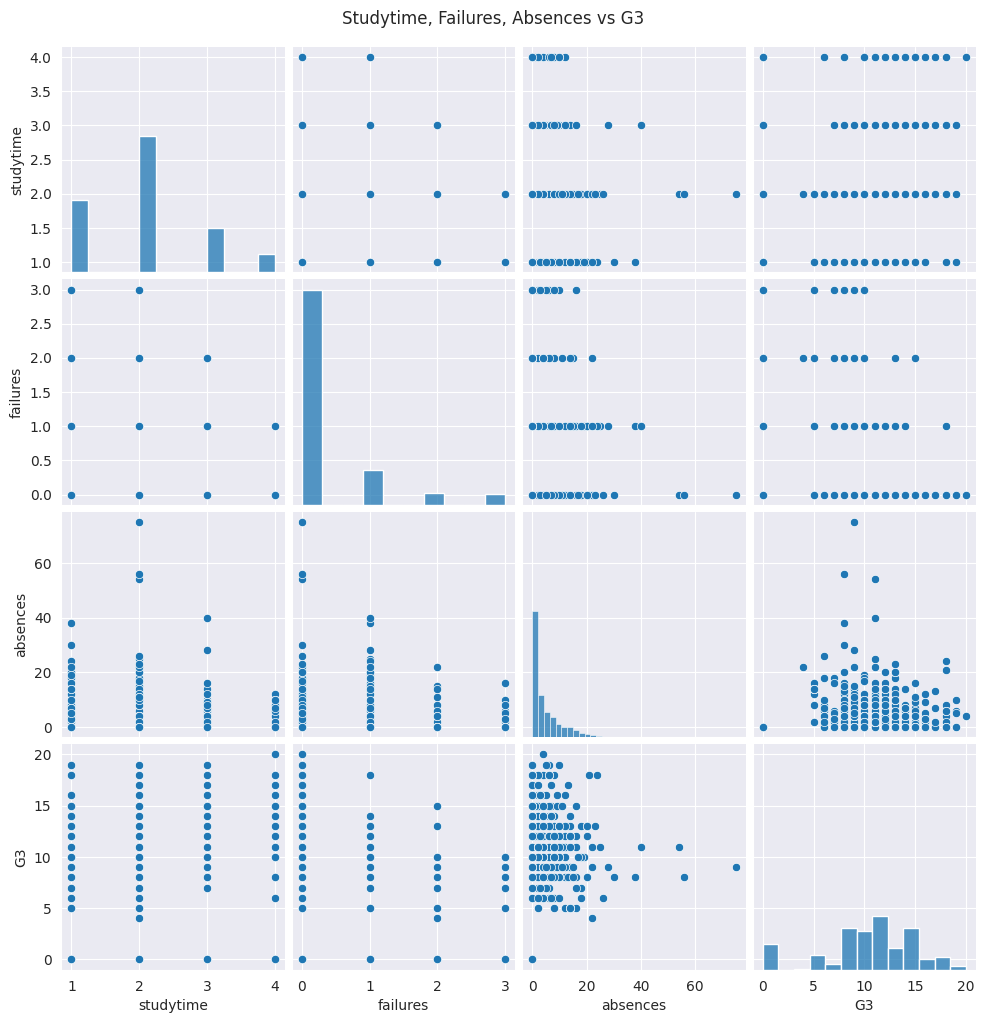

In [18]:
sns.pairplot(df)
plt.suptitle("Studytime, Failures, Absences vs G3", y=1.02)
plt.show()

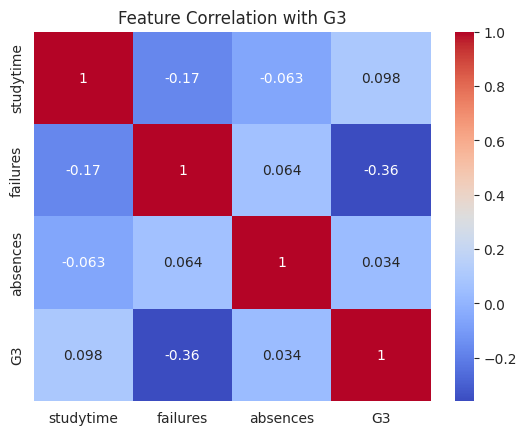

In [19]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with G3")
plt.show()

In [20]:
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Model Coefficients:")
for feat, coef in zip(features, model.coef_):
    print(f"  {feat}: {coef:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

Model Coefficients:
  studytime: 0.51
  failures: -2.27
  absences: 0.04
Intercept: 9.79


In [22]:
y_pred = model.predict(X_test)
print(f"\nMean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


Mean Squared Error: 19.87
R² Score: 0.03


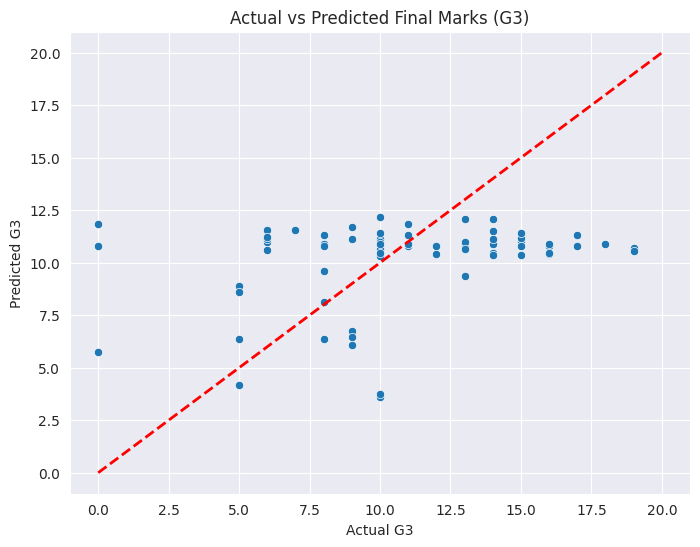

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Actual vs Predicted Final Marks (G3)")
plt.show()